<a href="https://colab.research.google.com/github/Wishva23/GUVI_CODEKATA_PYTHON_CODE/blob/master/posedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import cv2 as cv
import matplotlib.pyplot as plt

In [43]:
net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

In [44]:
inWidth = 368
inHeight = 368
thr = 0.2

In [45]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [46]:
img = cv.imread("posedetection.jpg")

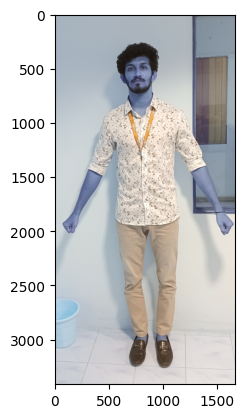

In [47]:
plt.imshow(img)

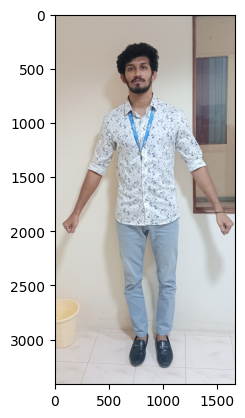

In [48]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [53]:
def pose_estimation(frame):
  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]
  net.setInput(cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5,127.5,127.5),swapRB=True,crop=False))
  out = net.forward()
  out = out [:,:19,:,:]
  assert(len(BODY_PARTS) == out.shape[1])
  points = []
  for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

  for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

  t, _ = net.getPerfProfile()
  freq = cv.getTickFrequency() / 1000
  cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
  return frame



In [54]:
estimated_image = pose_estimation(img)

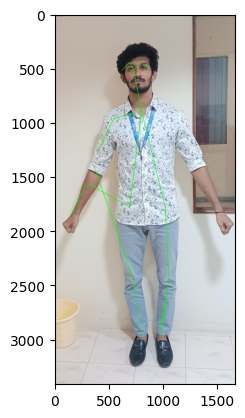

In [55]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [74]:
cap = cv.VideoCapture(0)

cap.set(cv.CAP_PROP_FPS,10)
cap.set(3,800)
cap.set(4,800)

if not cap.isOpened():
  cap = cv.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")

while cv.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv.waitKey()
        break

    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5,127.5,127.5),swapRB=True,crop=False))
    out = net.forward()
    out = out [:,:19,:,:]
    assert(len(BODY_PARTS) == out.shape[1])
    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    cv.imshow('OpenPose using OpenCV', frame)



OSError: ignored

In [73]:
import cv2

def check_webcam():
    # Check if the webcam is connected
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    # Get the width and height of the webcam
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    # Display the webcam feed
    while True:
        # Capture a frame from the webcam
        success, frame = cap.read()
        if not success:
            break

        # Display the frame
        cv2.imshow("Webcam", frame)

        # Press `q` to quit
        if cv2.waitKey(1) == ord('q'):
            break

    # Release the resources
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    check_webcam()

OSError: ignored